In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

In [2]:
url = 'https://raw.githubusercontent.com/freeCodeCamp/boilerplate-medical-data-visualizer/master/medical_examination.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#####  Task 1 : Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight. 

In [4]:
df['overweight'] = (df['weight'] / (df['height']/ 100) ** 2) \
                    .apply(lambda x: 0 if x < 25 else 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


##### Task 2 : Normalize the data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, make the value 0. If the value is more than 1, make the value 1.

In [5]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


##### Task 3 : Create a chart that shows the value counts of the categorical features using seaborn's catplot(). The dataset should be split by 'Cardio' so there is one chart for each cardio value. 

In [6]:
fig1_df = pd.melt(df,id_vars=['cardio'],value_vars=['active', 'alco','cholesterol', 'gluc', 'overweight', 'smoke'])

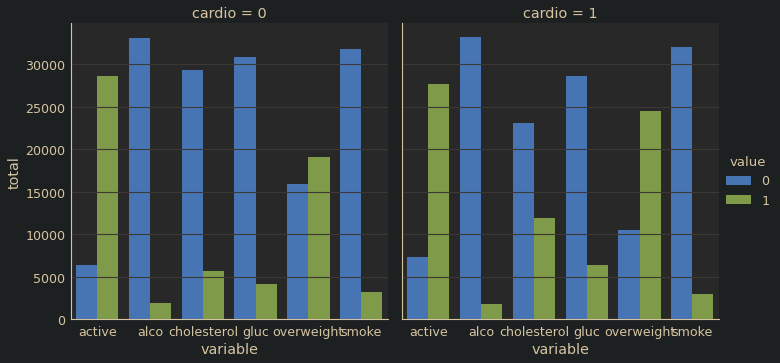

In [7]:
fig = sns.catplot(x='variable', y=None, hue='value', col='cardio', data=fig1_df, kind='count')
fig.set_ylabels('total')
fig.savefig('medical_data_catplot.png')

##### Task 4
* Clean the data. Filter out the following patient segments that represent incorrect data:
  - diastolic pressure is higher than systolic (Keep the correct data with `(df['ap_lo'] <= df['ap_hi'])`)
  - height is less than the 2.5th percentile (Keep the correct data with `(df['height'] >= df['height'].quantile(0.025))`)
  - height is more than the 97.5th percentile
  - weight is less than the 2.5th percentile
  - weight is more than the 97.5th percentile

In [8]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975)) &
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975)) ]
df_heat

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


##### Task 5 :Create a correlation matrix using the dataset and Mask the upper triangle.

In [9]:
corr = df_heat.corr()
mask = np.triu(np.ones_like(corr))

##### Task 6 : Plot the correlation matrix using seaborn's `heatmap()`.

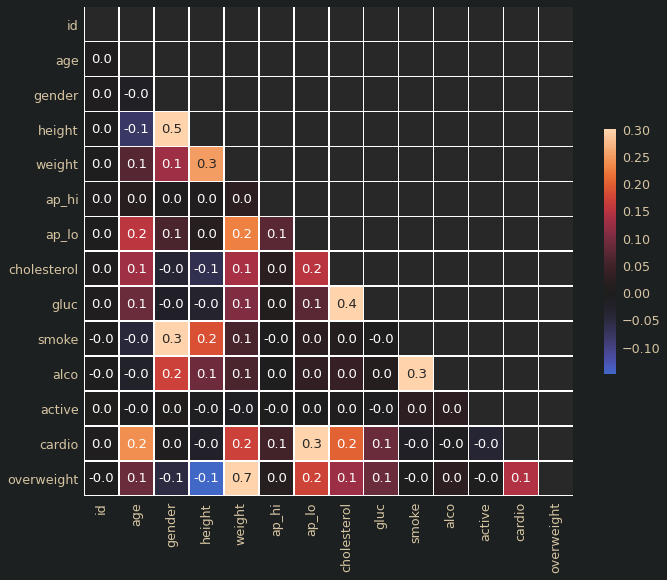

In [10]:
fig2, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, annot=True,fmt='0.1f',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
fig2.savefig('medical_data_correlation_heatmap.png')